# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [3]:
raw_data = pd.read_csv('iris_dataset.csv')
raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

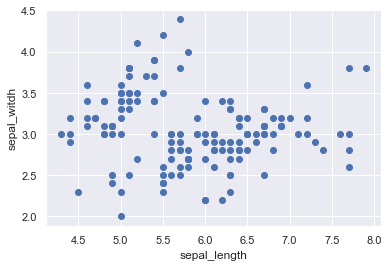

In [8]:
plt.scatter(raw_data['sepal_length'], raw_data['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_witdh')
plt.show()

# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [14]:
x = raw_data.copy()

In [15]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [17]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

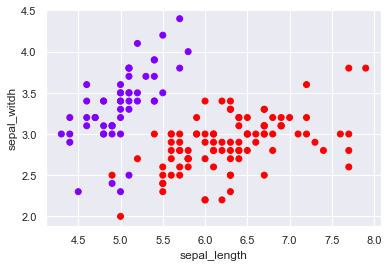

In [19]:
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_witdh')
plt.show()

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [21]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Clustering (scaled data)

In [22]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy() # Original values
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled) # standardized data

In [23]:
clusters_new

,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


Text(0, 0.5, 'sepal_width')

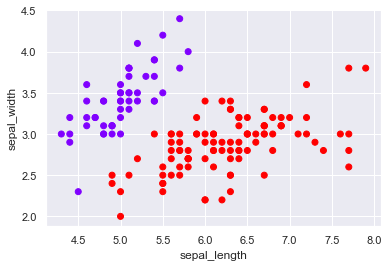

In [24]:
plt.scatter(clusters_new['sepal_length'], clusters_new['sepal_width'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

## Take Advantage of the Elbow Method

### WCSS

In [27]:
wcss=[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[600.0000000000003,
 223.73200573676343,
 140.96837895511072,
 114.61550694959811,
 91.07563926881433,
 80.75779110759106,
 72.72567521566516,
 63.54749350659618,
 54.41887692898719]

### The Elbow Method

Text(0, 0.5, 'WCSS')

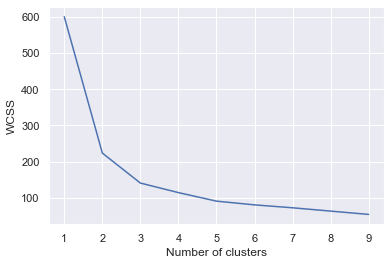

In [28]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

How many clusters are there?

looks like the 2 or 3 cluster solutions are the best